In [1]:
# Install keleido if not installed and saving the images.
# !pip install kaleido

In [2]:
import sys

sys.path.append("..")

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import plotly
print(plotly.__version__)

from src.const import EventData, GameData, GameBoxScoreData, GameSummaryData, TeamData
from src.data import load
from src.preprocess import aggregate
from src.utils import join_data, preprocess_game_summary
from src.visualize import BarPlotly, DistPlotly

4.13.0


- ベンチスコア平均（チーム）
- 4Qスコア平均（チーム）
    - 点差5点差以内、4Q平均試投数・平均得点（チーム）
- 3P試投数・成功数・成功率（選手・チーム）
- FT試投数・成功数・成功率（選手・チーム）
- TO / posession（選手・チーム）
- Offence Efficiency（チーム）
- Deffence Efficiency（チーム）
    - 去年と今年の比較

In [5]:
df_game = load(GameData.games_202021)
display(df_game.head().T)

0           1           2           3           4
ScheduleKey        5938        5939        5890        5903        5891
Season          2020-21     2020-21     2020-21     2020-21     2020-21
EventId               2           2           2           2           2
Date         2020.10.24  2020.10.25  2020.10.09  2020.10.18  2020.10.10
Arena        おおきにアリーナ舞洲  おおきにアリーナ舞洲  広島サンプラザホール     横浜国際プール  広島サンプラザホール
Attendance         1675        1255        2061        1517        2221
HomeTeamId          700         700         721         694         721
AwayTeamId          706         706         706         706         706

In [6]:
df_game_box = load(GameBoxScoreData.games_boxscore_202021)
df_bame_box = df_game_box[df_game_box["ScheduleKey"]<=6003]
display(df_game_box.head().T)

0           1        2         3      4
ScheduleKey      5938        5938     5938      5938   5938
TeamId            700         700      700       700    700
BoxType         Total       Total    Total     Total  Total
PlayerId        10849       32984    32982     32983  30349
Player           伊藤達哉  エリエット・ドンリー     角野亮伍  駒水大雅ジャック   中村浩陸
Number              2           3        8        10     13
Position           PG          SF       SF        SF     PG
StarterBench  Starter       Bench  Starter     Bench  Bench
MIN              21.9        1.93    31.65       1.4      0
MIN.STR         21:54       01:56    31:39     01:24  00:00
PTS                10           0        2         0      0
FGM                 5           0        1         0      0
FGA                 9           0        6         0      0
F3GM                0           0        0         0      0
F3GA                0           0        4         0      0
FTM                 0           0        0         0      0
FTA                 0           0        0         0      0
OR                  0           0        0         0      0
DR                  0           0        2         0      0
TR                  0           0        2         0      0
AS                  8           0        0         0      0
TO                  1           0        2         1      0
ST                  2           0        1         0      0
BS                  0           0        0         0      0
BSR                 0           0        0         0      0
F                   0           0        2         0      0
FD                  1           0        0         0      0
DUNK                0           0        0         0      0
EFF                16           0       -4        -1      0

In [7]:
df_game_summary = load(GameSummaryData.games_summary_202021)
df_game_summary = df_game_summary[df_game_summary["ScheduleKey"]<=6003]
display(df_game_summary.head().T)

0            1           2           3  \
ScheduleKey              5938         5938        5939        5939   
TeamId                    700          706         700         706   
PTS                        69           97          77          85   
Q1                         21           23          15          29   
Q2                          8           27          23          14   
Q3                         21           31          16          17   
Q4                         19           16          23          25   
OT1                         0            0           0           0   
OT2                         0            0           0           0   
OT3                         0            0           0           0   
OT4                         0            0           0           0   
F2GM                       22           36          27          28   
F2GA                       41           51          46          41   
F3GM                        5            5           5           8   
F3GA                       19           11          18          22   
FTM                        10           10           8           5   
FTA                        16           12          10           5   
OR                          9            1          11           4   
DR                         19           27          23          21   
TR                         28           28          34          25   
AS                         16           26          17          23   
TO                         18           11          13           9   
ST                          8           12           5           8   
BS                          1            4           3           1   
F                          16           18          17          17   
PtsBiggestLead              3           36           2          18   
PtsInPaint                 32           64          46          44   
PtsFastBreak                6           24           8           6   
PtsSecondChance             6            2          13           5   
PtsFromTurnover            21           26          11          14   
BiggestScoringRun  9-0(56-81)  15-0(29-63)  6-0(15-27)  10-0(6-20)   
LeadChanges                 6            6           2           2   
TimesTied                   3            3           2           2   

                             4  
ScheduleKey               5890  
TeamId                     721  
PTS                         71  
Q1                          21  
Q2                          16  
Q3                          18  
Q4                          16  
OT1                          0  
OT2                          0  
OT3                          0  
OT4                          0  
F2GM                        24  
F2GA                        41  
F3GM                         4  
F3GA                        14  
FTM                         11  
FTA                         16  
OR                           7  
DR                          26  
TR                          33  
AS                          21  
TO                          18  
ST                           6  
BS                           0  
F                           18  
PtsBiggestLead               9  
PtsInPaint                  32  
PtsFastBreak                12  
PtsSecondChance             10  
PtsFromTurnover             12  
BiggestScoringRun  10-0(47-39)  
LeadChanges                  2  
TimesTied                    2

In [8]:
df_team = load(TeamData.teams)
df_team = df_team[(df_team["Season"]=="2020-21") & (df_team["League"]=="B1")]
display(df_team.head().T)

144          145       146      147      148
TeamId         702          693       703      704      706
Season     2020-21      2020-21   2020-21  2020-21  2020-21
League          B1           B1        B1       B1       B1
NameShort      北海道           秋田       宇都宮       千葉      A東京
NameLong   レバンガ北海道  秋田ノーザンハピネッツ  宇都宮ブレックス   千葉ジェッツ  アルバルク東京
Division       東地区          東地区       東地区      東地区      東地区

**Join**

In [9]:
df_game_box, df_game_summary = join_data(df_game_box, df_game_summary, df_team)
df_game_summary = preprocess_game_summary(df_game_summary)

## 得点・被得点

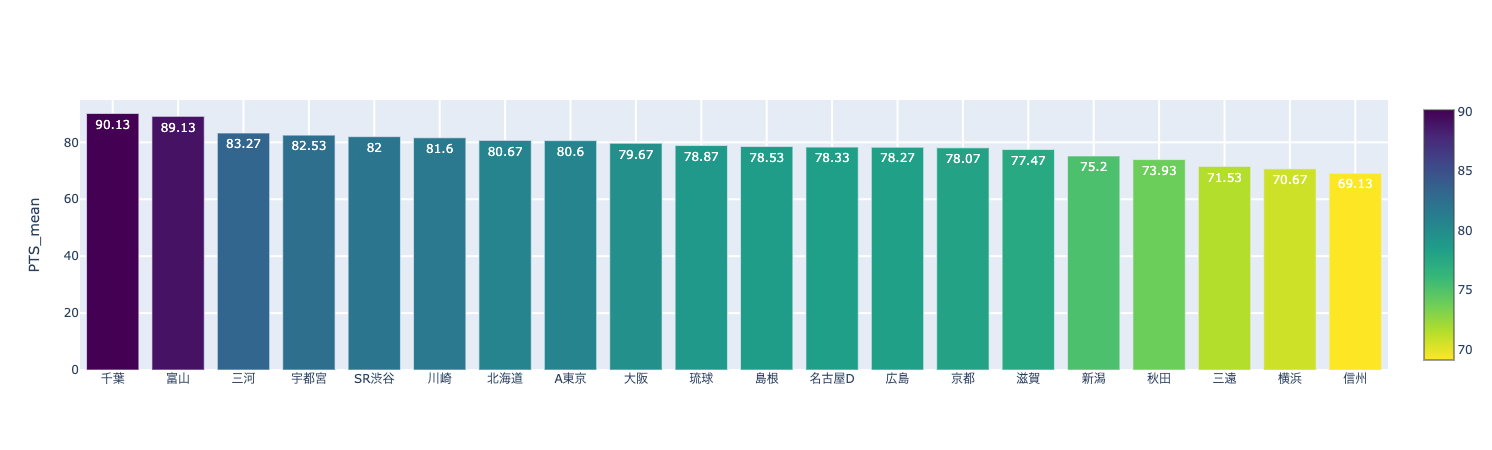

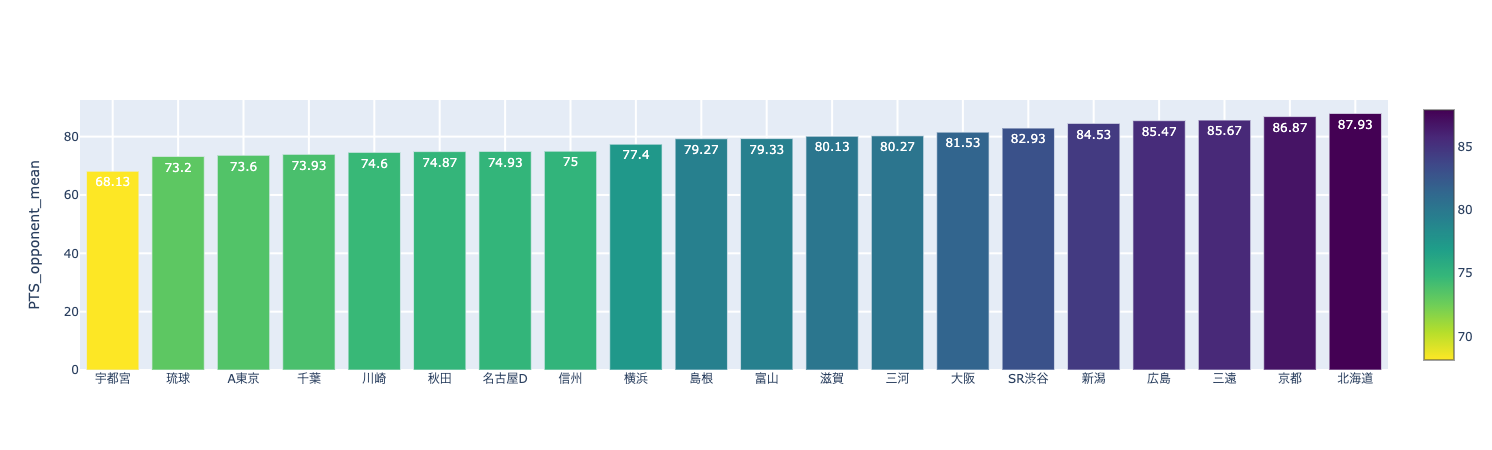

In [10]:
df_score = aggregate(df_game_summary, key="NameShort", agg_dict={"PTS": ["mean"], "PTS_opponent": ["mean"]})

for ycol in ["PTS_mean", "PTS_opponent_mean"]:
    if ycol == "PTS_mean":
        BarPlotly().show(df_score.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")
    if ycol == "PTS_opponent_mean":
        BarPlotly().show(df_score.sort_values(ycol, ascending=True), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

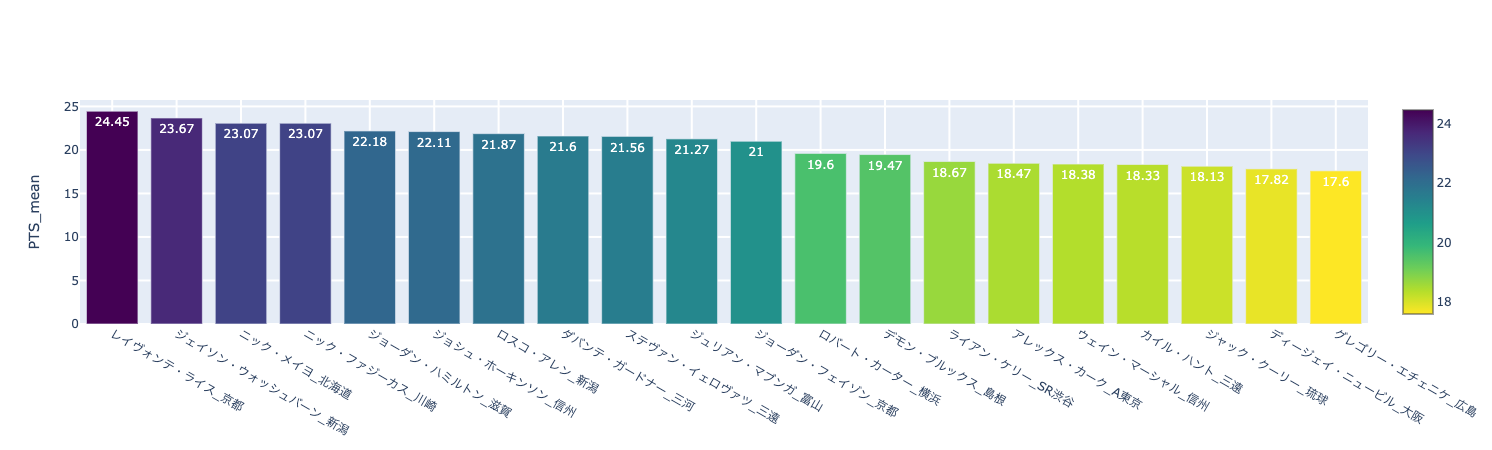

In [11]:
df_score_player = aggregate(df_game_box, key="Player_Team", agg_dict={"PTS": ["mean"]})

for ycol in ["PTS_mean"]:
    BarPlotly().show(df_score_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player.png")

## ベンチスコア

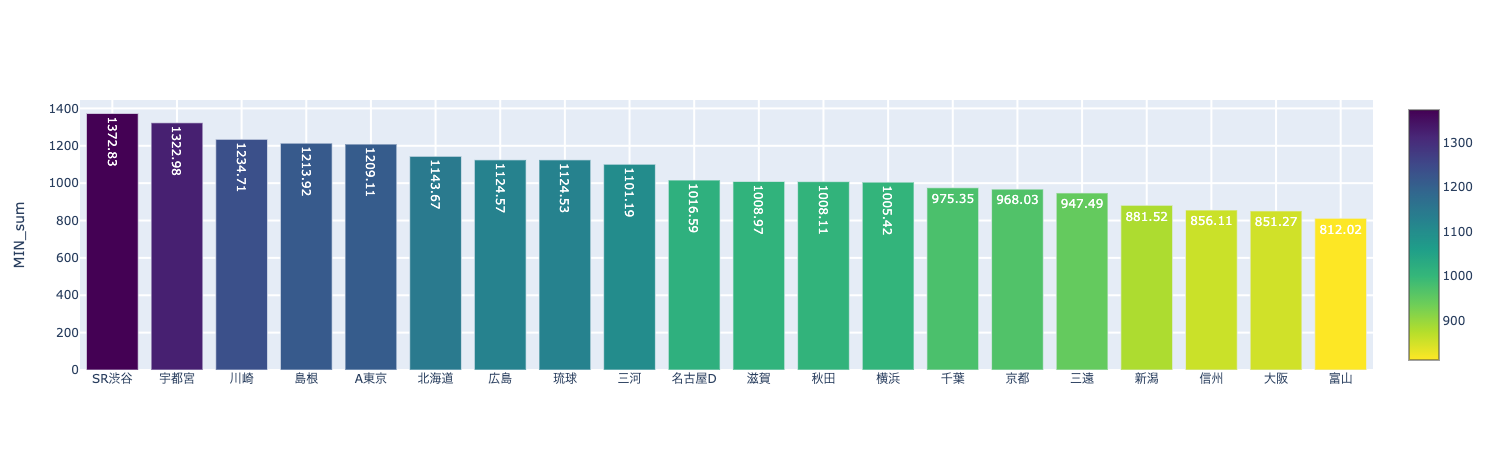

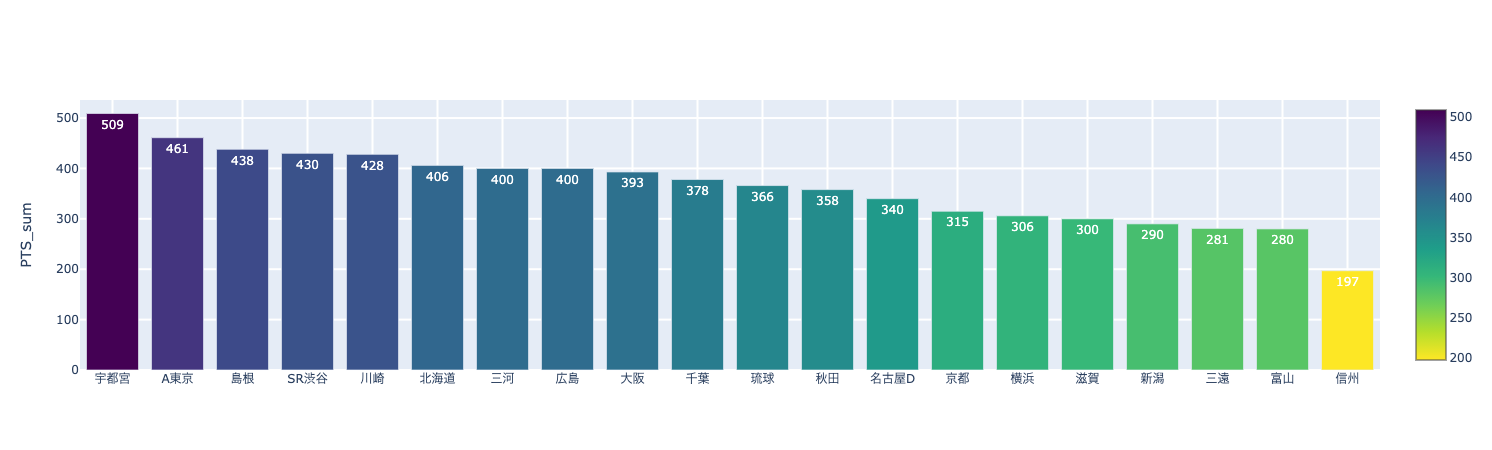

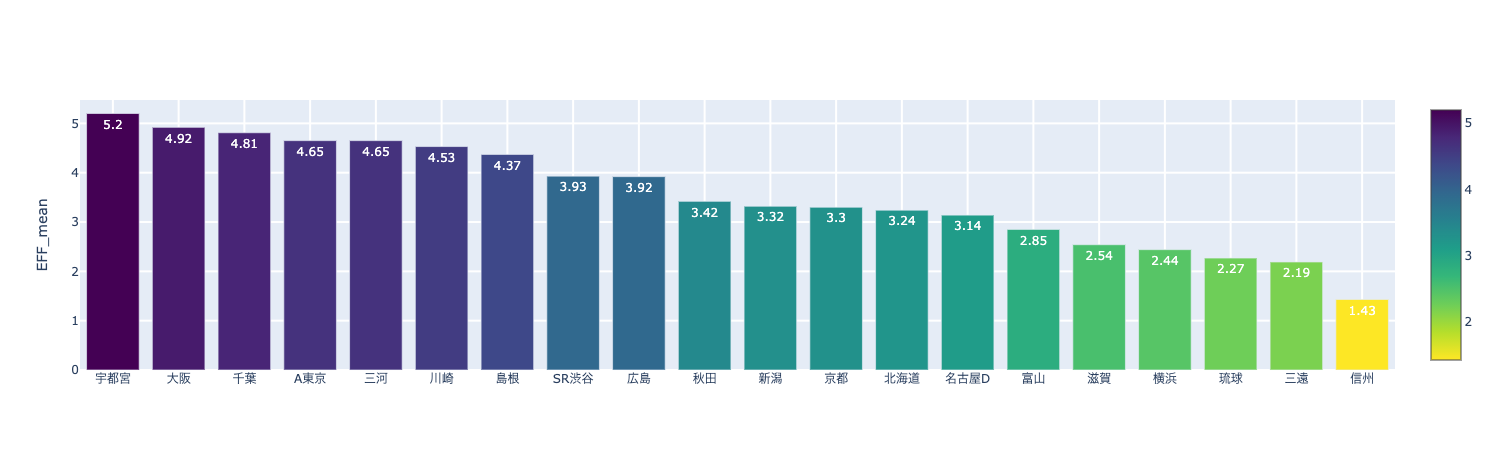

In [12]:
df_bench = df_game_box[df_game_box["StarterBench"]=="Bench"]
df_bench = aggregate(df_bench, key="NameShort", agg_dict={"MIN": ["sum"], "PTS": ["sum"], "EFF": ["mean"]})

for ycol in ["MIN_sum", "PTS_sum", "EFF_mean"]:
    BarPlotly().show(df_bench.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_bench.png")

## リバウンド

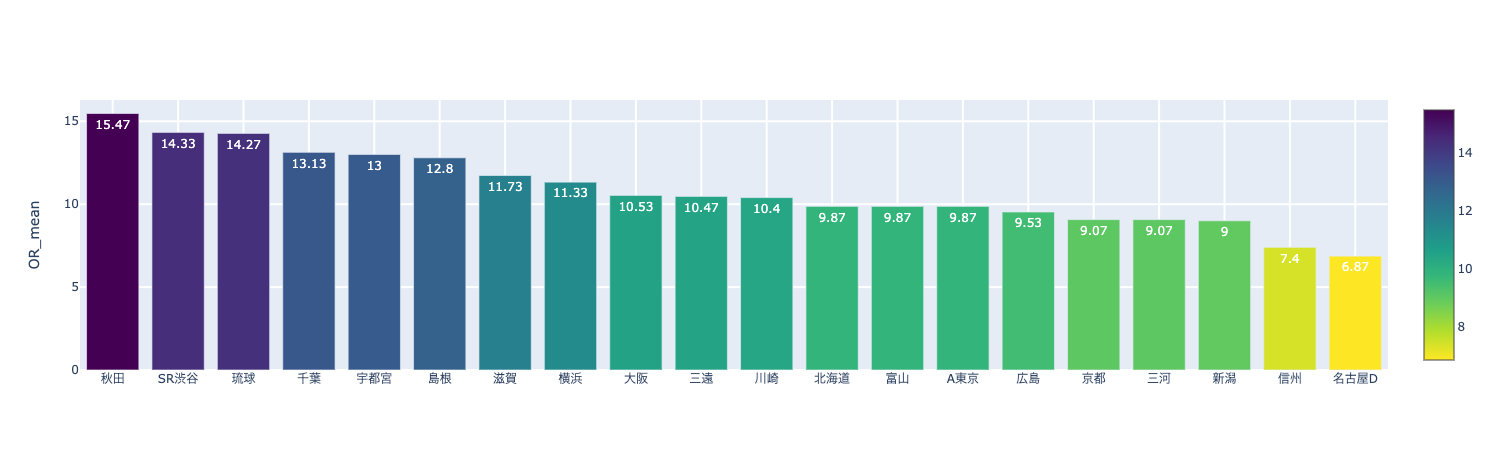

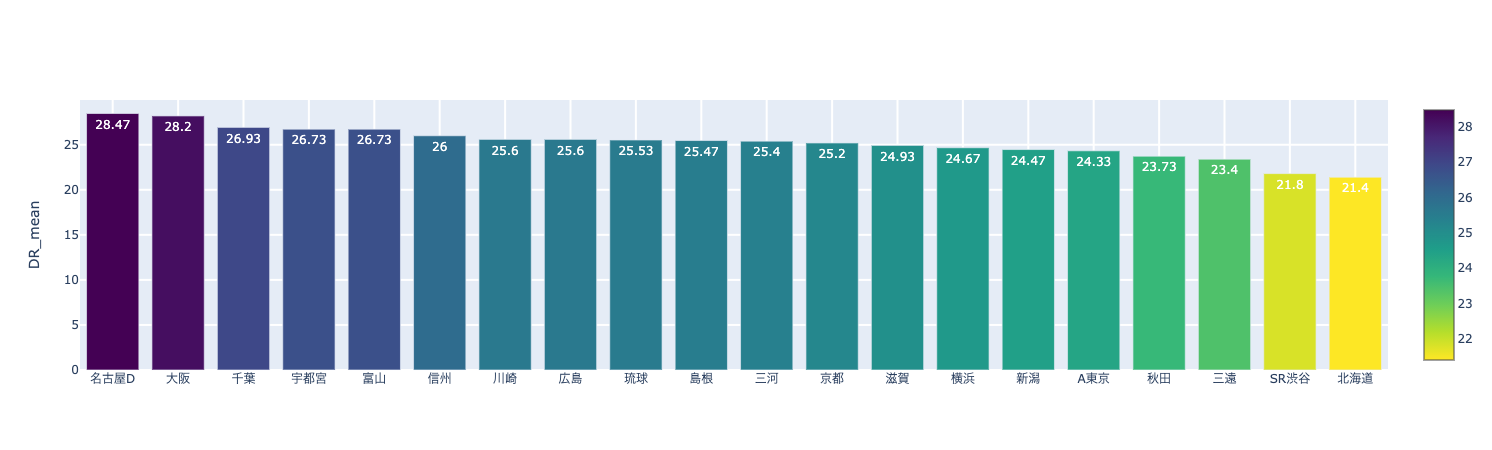

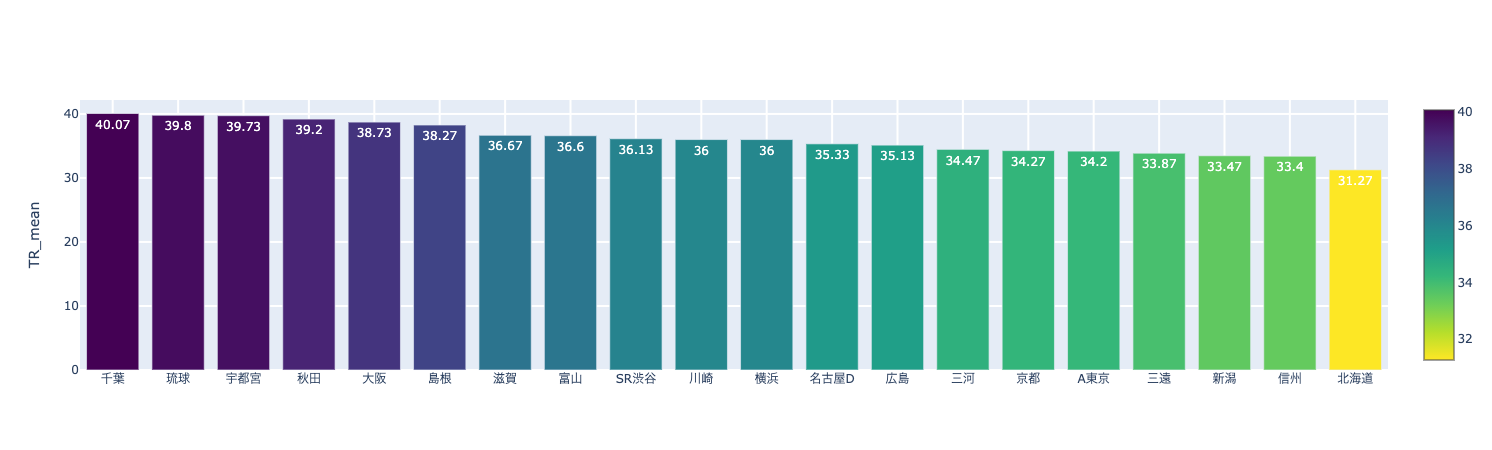

In [13]:
df_rebound = aggregate(df_game_summary, key="NameShort", agg_dict={"OR": ["mean"], "DR": ["mean"], "TR": ["mean"]})

for ycol in ["OR_mean", "DR_mean", "TR_mean"]:
    BarPlotly().show(df_rebound.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

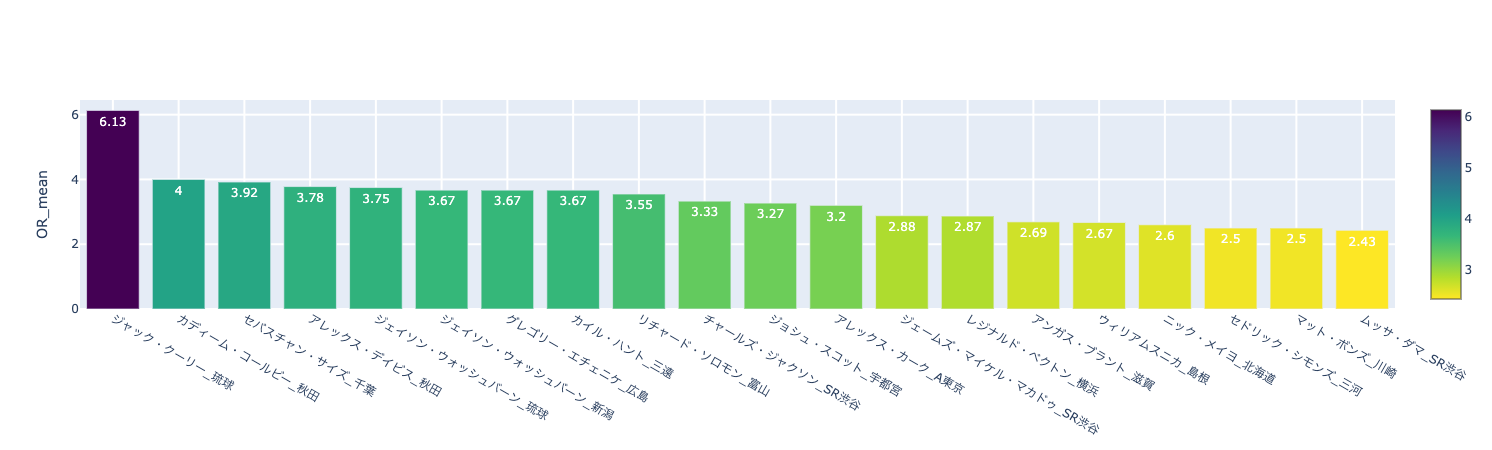

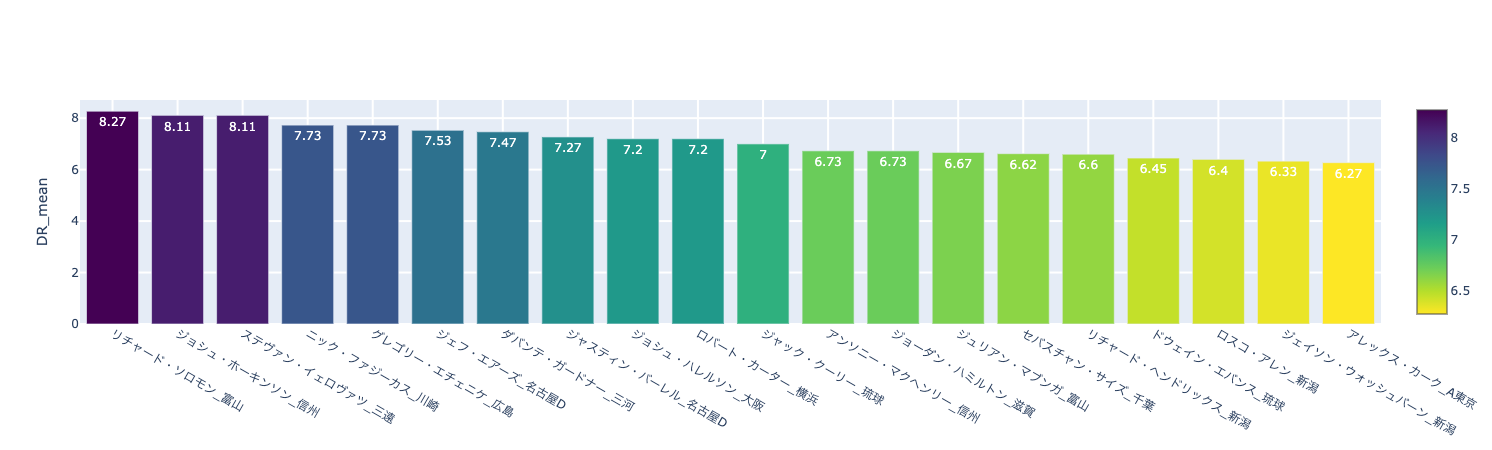

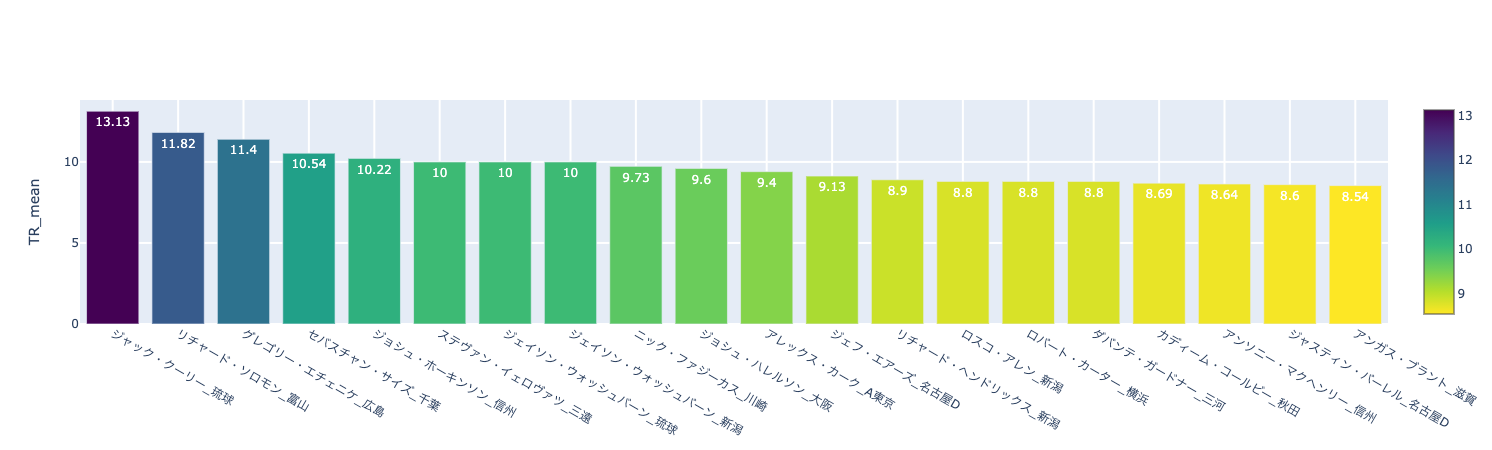

In [14]:
df_rebound_player = aggregate(df_game_box, key="Player_Team", agg_dict={"OR": ["mean"], "DR": ["mean"], "TR": ["mean"]})

for ycol in ["OR_mean", "DR_mean", "TR_mean"]:
    BarPlotly().show(df_rebound_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player.png")

## アシスト

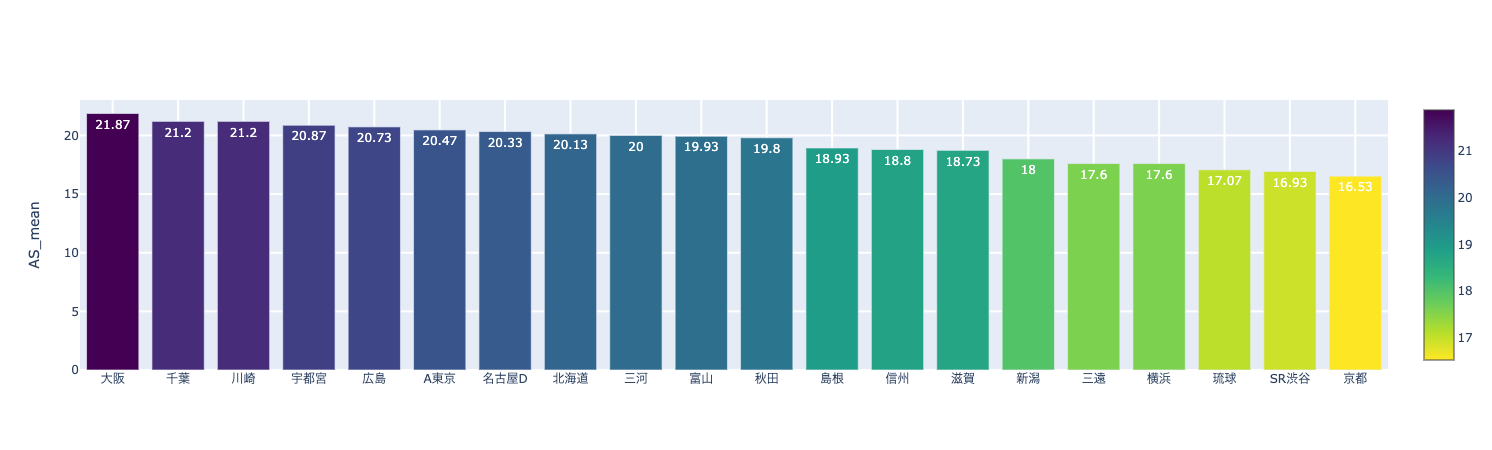

In [15]:
df_assist = aggregate(df_game_summary, key="NameShort", agg_dict={"AS": ["mean"]})

for ycol in ["AS_mean"]:
    BarPlotly().show(df_assist.sort_values(ycol, ascending=False).head(20), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

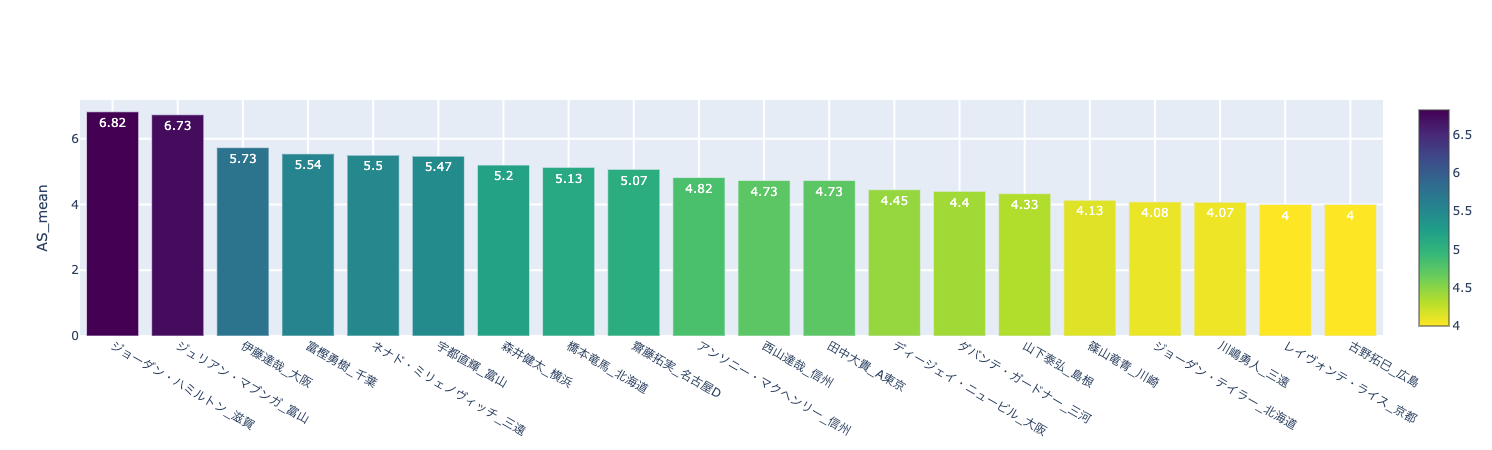

In [16]:
df_assist_player = aggregate(df_game_box, key="Player_Team", agg_dict={"AS": ["mean"]})

for ycol in ["AS_mean"]:
    BarPlotly().show(df_assist_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player.png")

## スティール

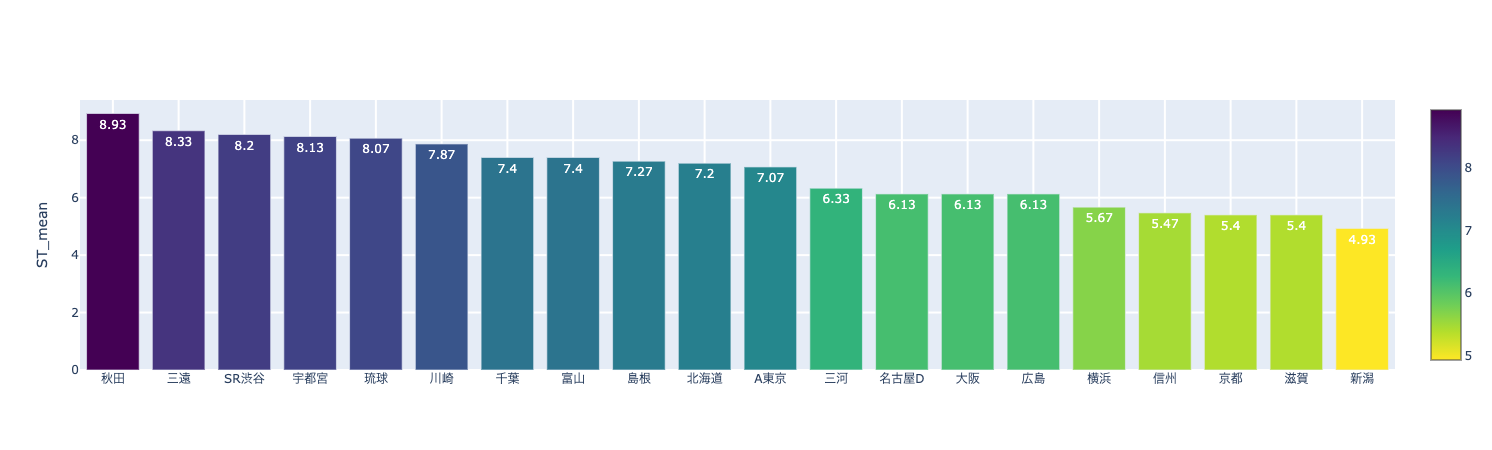

In [17]:
df_steal = aggregate(df_game_summary, key="NameShort", agg_dict={"ST": ["mean"]})

for ycol in ["ST_mean"]:
    BarPlotly().show(df_steal.sort_values(ycol, ascending=False).head(20), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

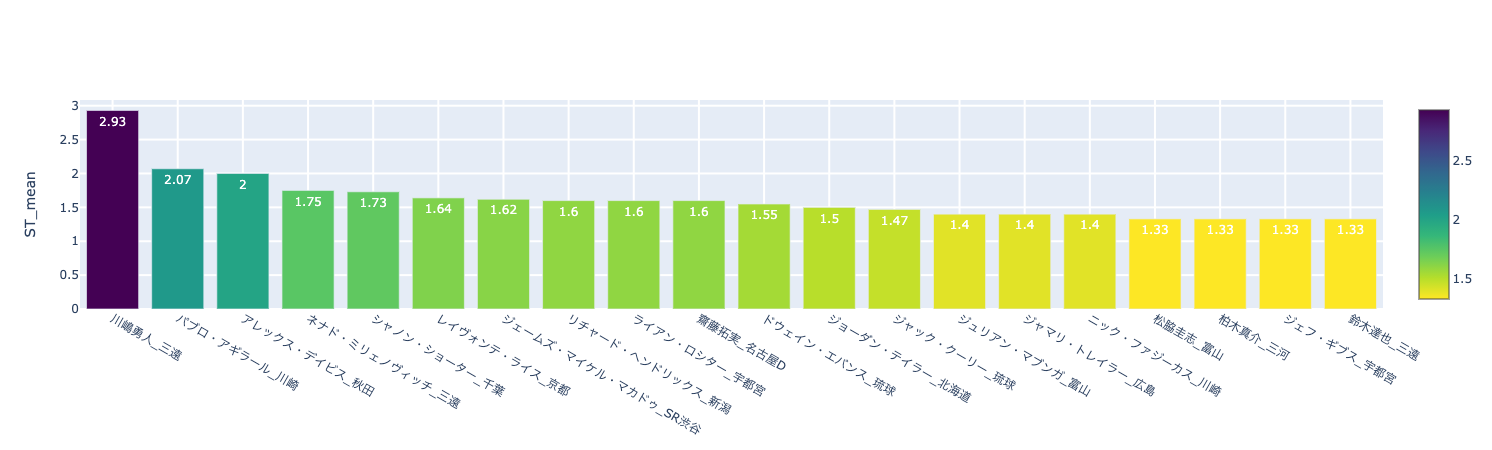

In [18]:
df_steal_player = aggregate(df_game_box, key="Player_Team", agg_dict={"ST": ["mean"]})

for ycol in ["ST_mean"]:
    BarPlotly().show(df_steal_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player.png")

## ブロック

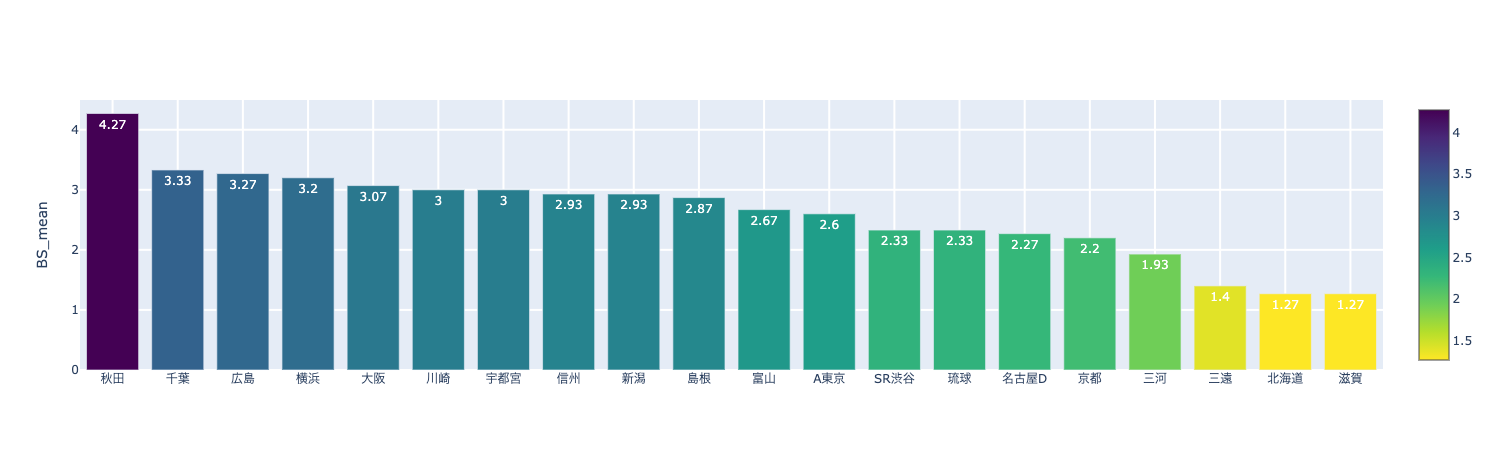

In [19]:
df_block = aggregate(df_game_summary, key="NameShort", agg_dict={"BS": ["mean"]})

for ycol in ["BS_mean"]:
    BarPlotly().show(df_block.sort_values(ycol, ascending=False).head(20), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

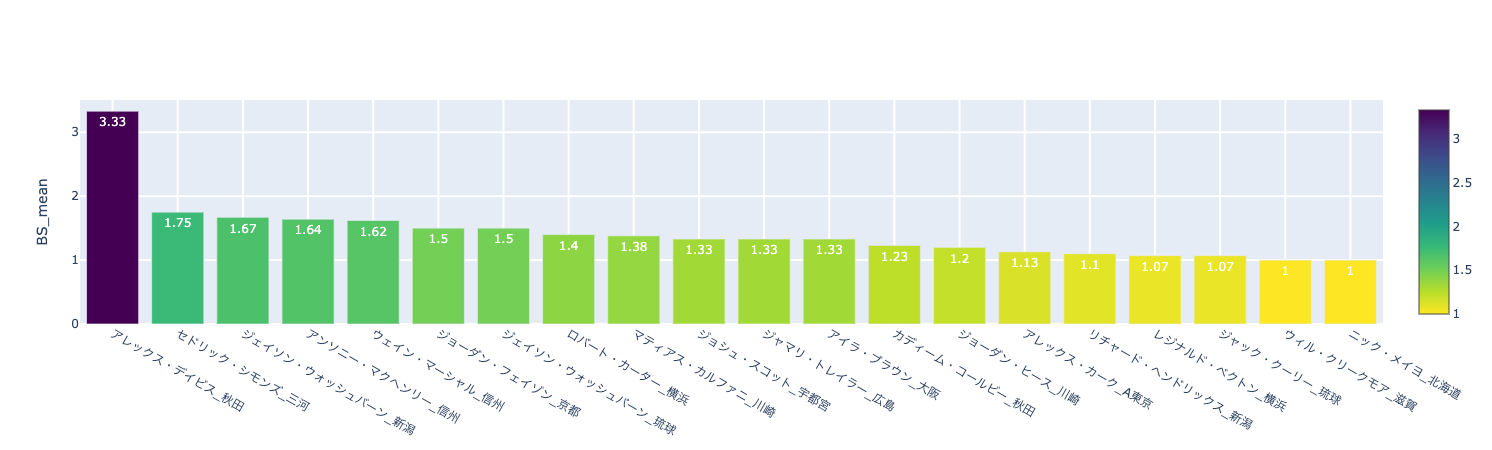

In [20]:
df_block_player = aggregate(df_game_box, key="Player_Team", agg_dict={"BS": ["mean"]})

for ycol in ["BS_mean"]:
    BarPlotly().show(df_block_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player.png")

## 3PT

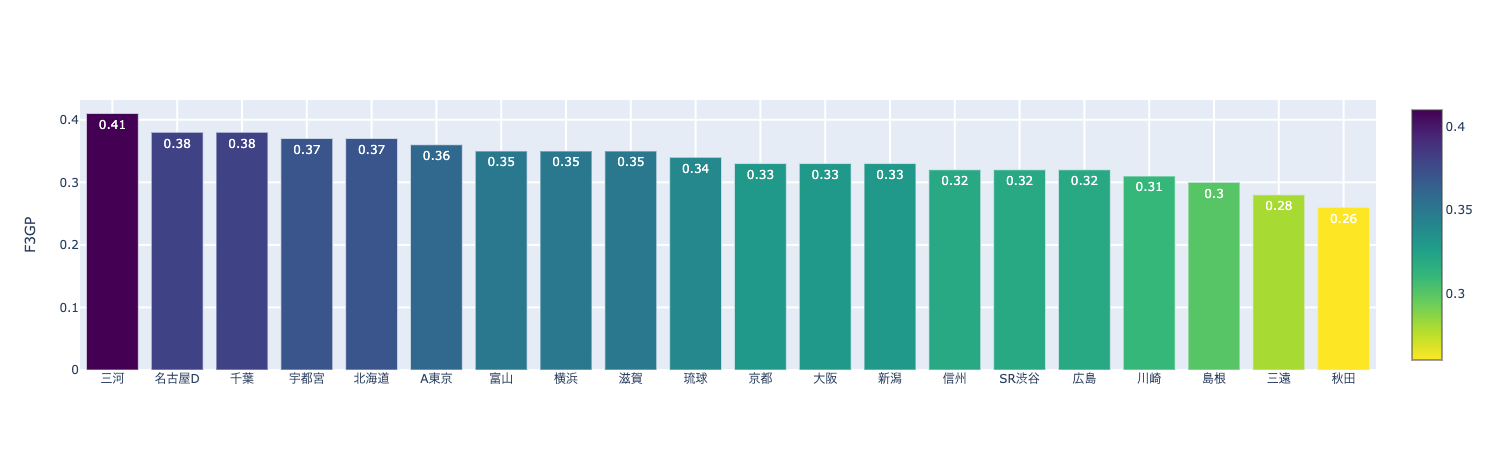

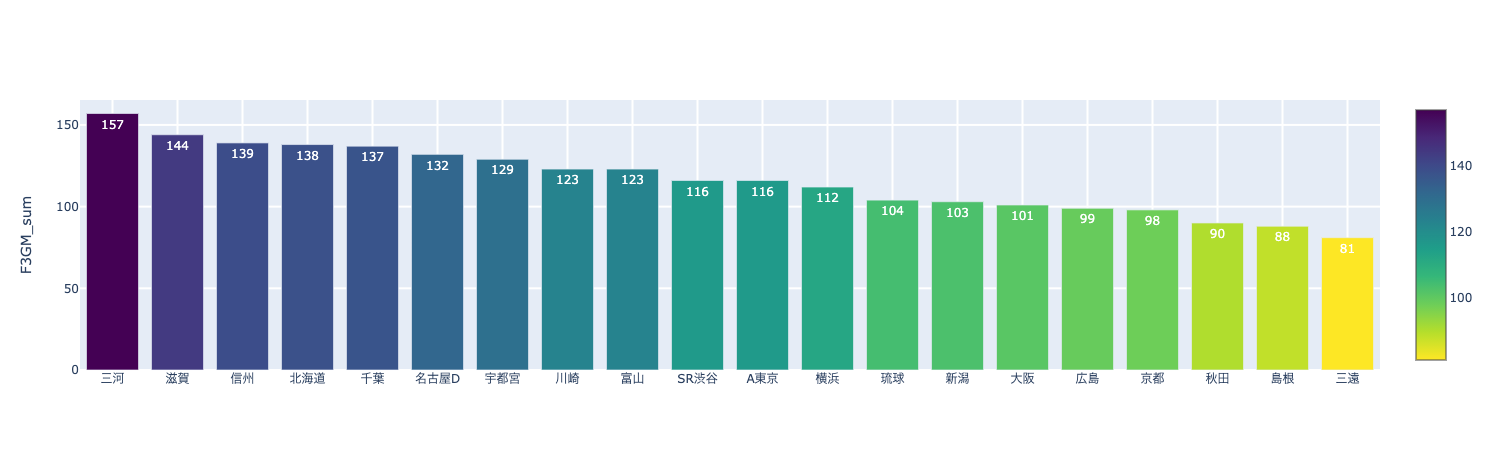

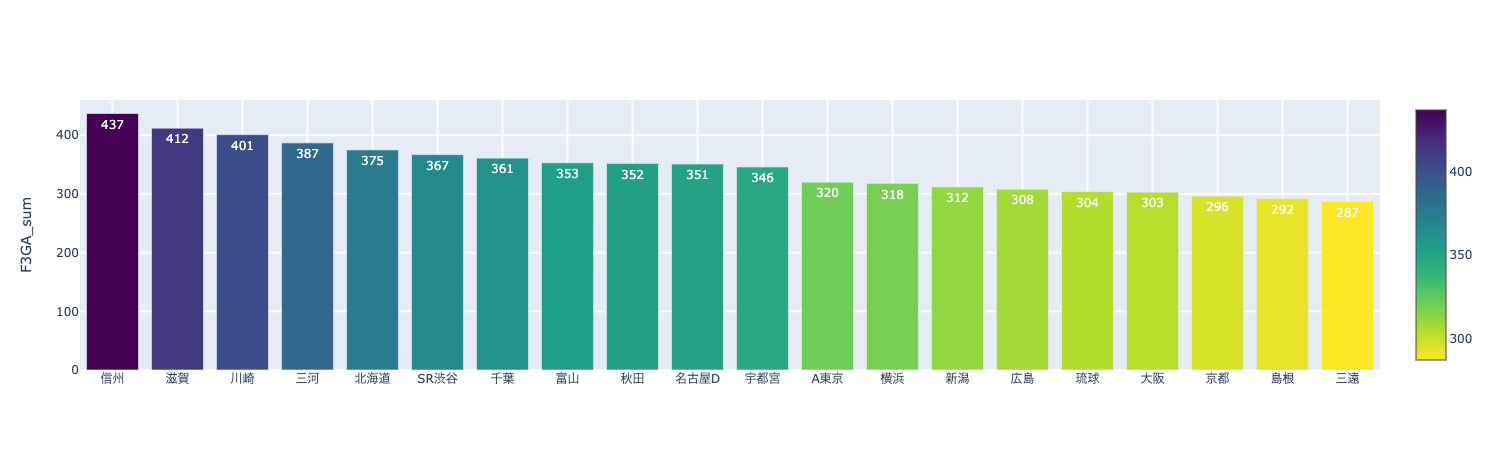

In [21]:
df_3pt = aggregate(df_game_summary, key="NameShort", agg_dict={"F3GM": ["sum"], "F3GA": ["sum"]})
df_3pt["F3GP"] = (df_3pt["F3GM_sum"] / df_3pt["F3GA_sum"]).round(2)

for ycol in ["F3GP", "F3GM_sum", "F3GA_sum"]:
    BarPlotly().show(df_3pt.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

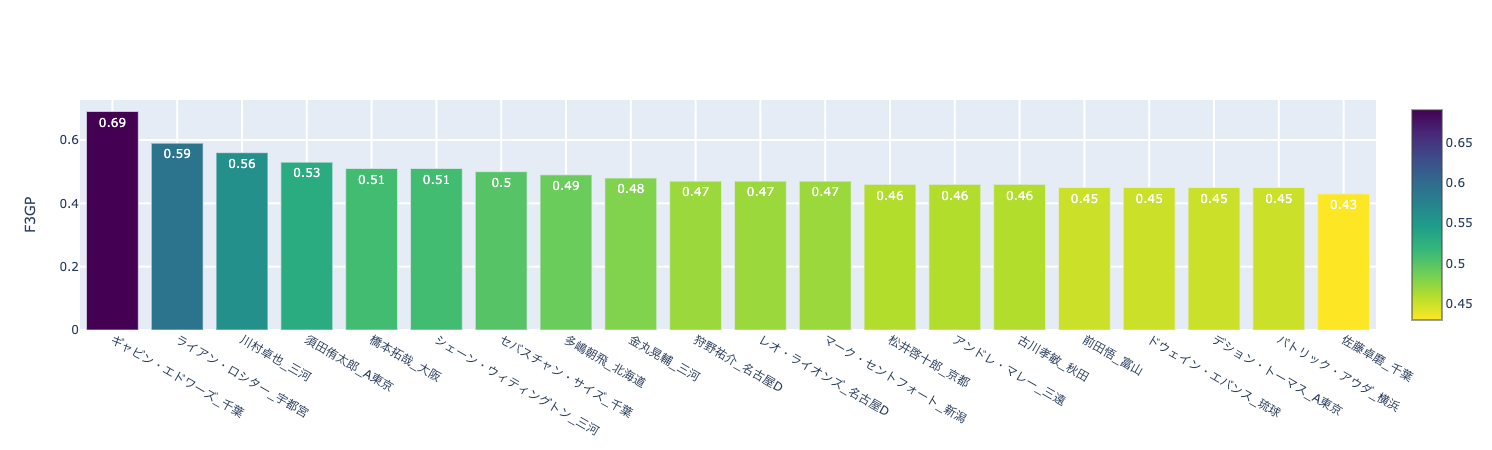

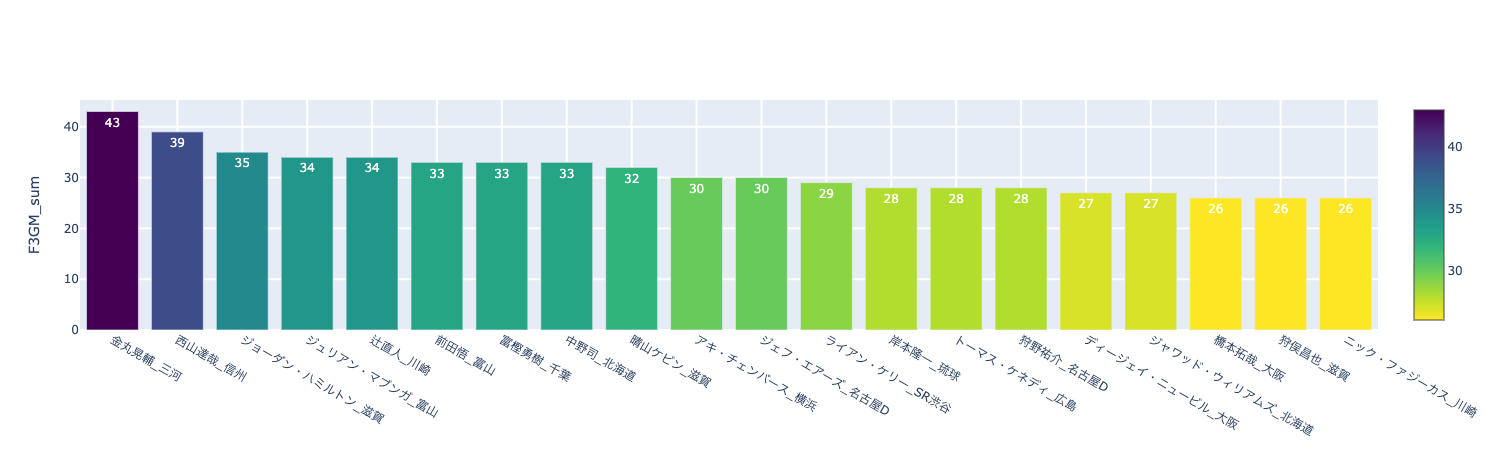

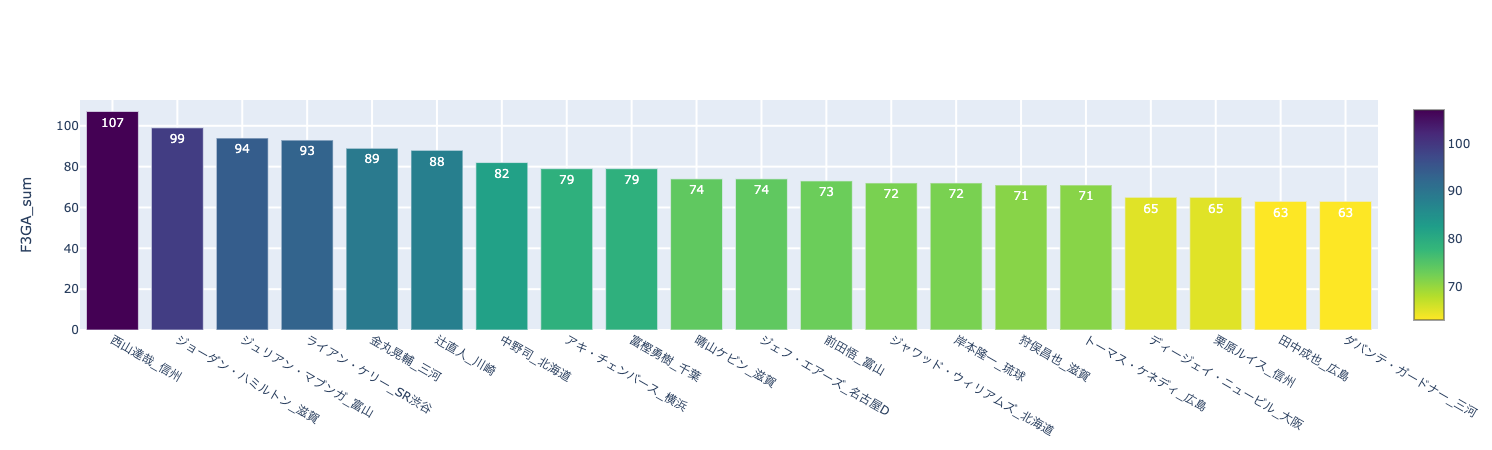

In [22]:
df_3pt_player = aggregate(df_game_box, key="Player_Team", agg_dict={"F3GM": ["sum"], "F3GA": ["sum"]})
df_3pt_player["F3GP"] = (df_3pt_player["F3GM_sum"] / df_3pt_player["F3GA_sum"]).round(2)
df_3pt_player = df_3pt_player[df_3pt_player["F3GA_sum"]>=10]

for ycol in ["F3GP", "F3GM_sum", "F3GA_sum"]:
    BarPlotly().show(df_3pt_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player_head.png")

## FT

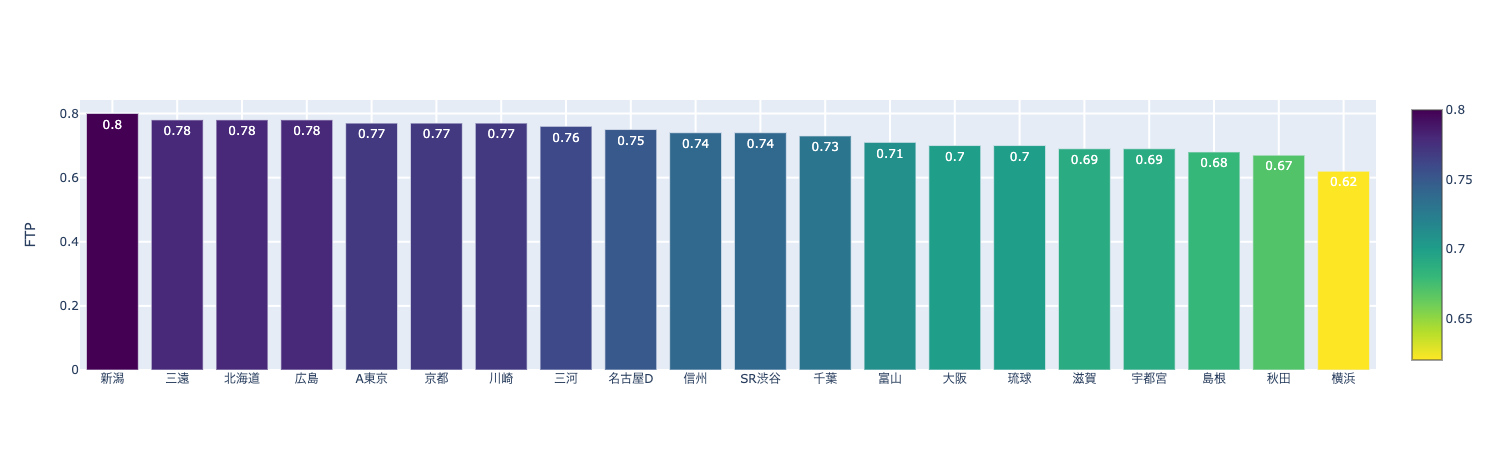

In [23]:
df_ft_team = aggregate(df_game_summary, key="NameShort", agg_dict={"FTM": ["sum"], "FTA": ["sum"]})
df_ft_team["FTP"] = (df_ft_team["FTM_sum"] / df_ft_team["FTA_sum"]).round(2)

for ycol in ["FTP"]:
    BarPlotly().show(df_ft_team.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

**Player**

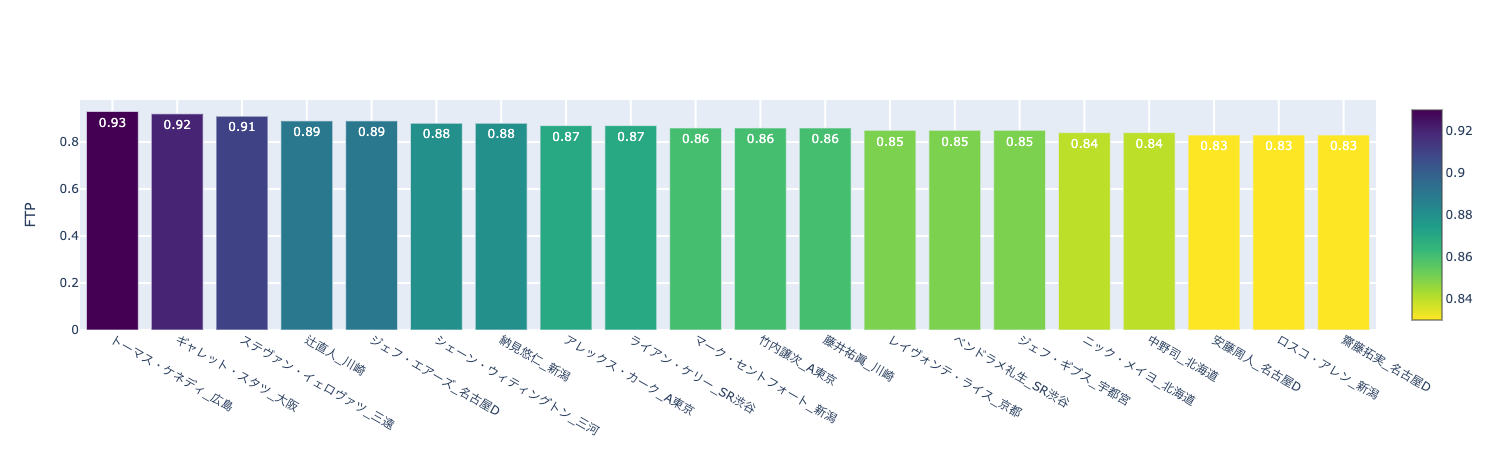

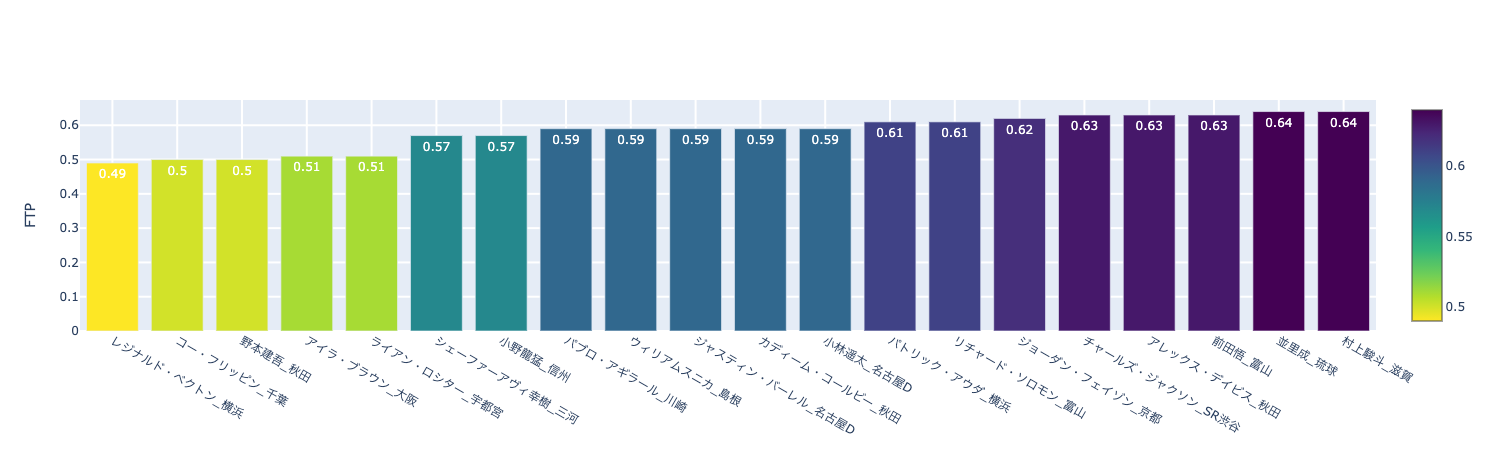

In [24]:
df_ft_player = aggregate(df_game_box, key="Player_Team", agg_dict={"FTM": ["sum"], "FTA": ["sum"]})
df_ft_player["FTP"] = (df_ft_player["FTM_sum"] / df_ft_player["FTA_sum"]).round(2)
df_ft_player = df_ft_player[df_ft_player["FTA_sum"] > 20]

for ycol in ["FTP"]:
    BarPlotly().show(df_ft_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player_head.png")
    BarPlotly().show(df_ft_player.sort_values(ycol, ascending=True).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player_tail.png")

## Possession

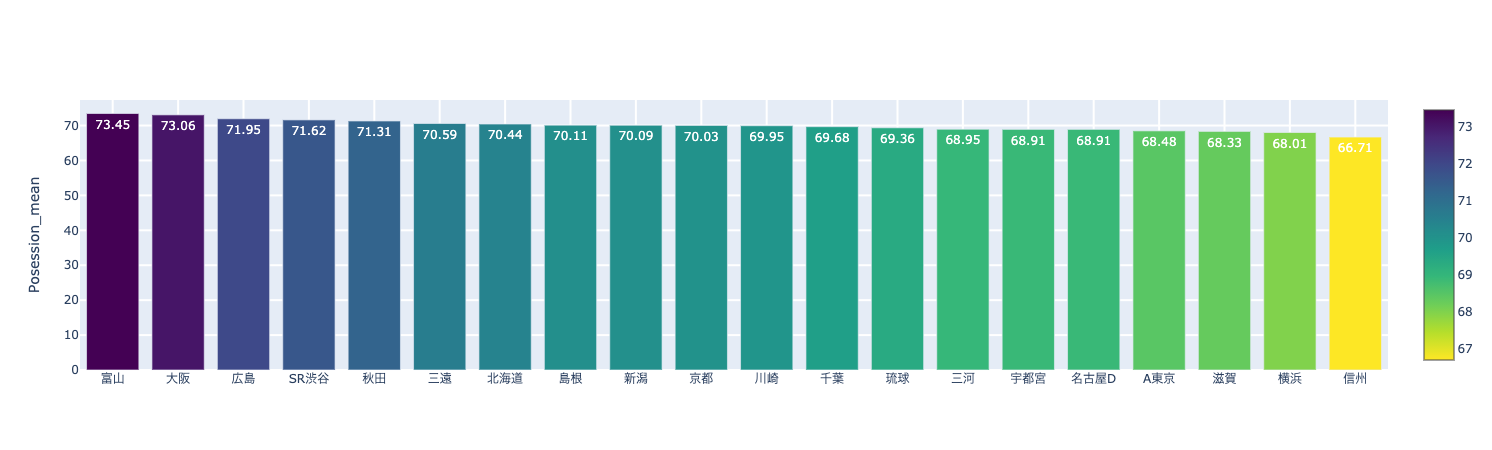

In [25]:
df_Possession = aggregate(df_game_summary, key="NameShort", agg_dict={"Posession": ["mean"]})

for ycol in ["Posession_mean"]:
    BarPlotly().show(df_Possession.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

## TO / Possessions

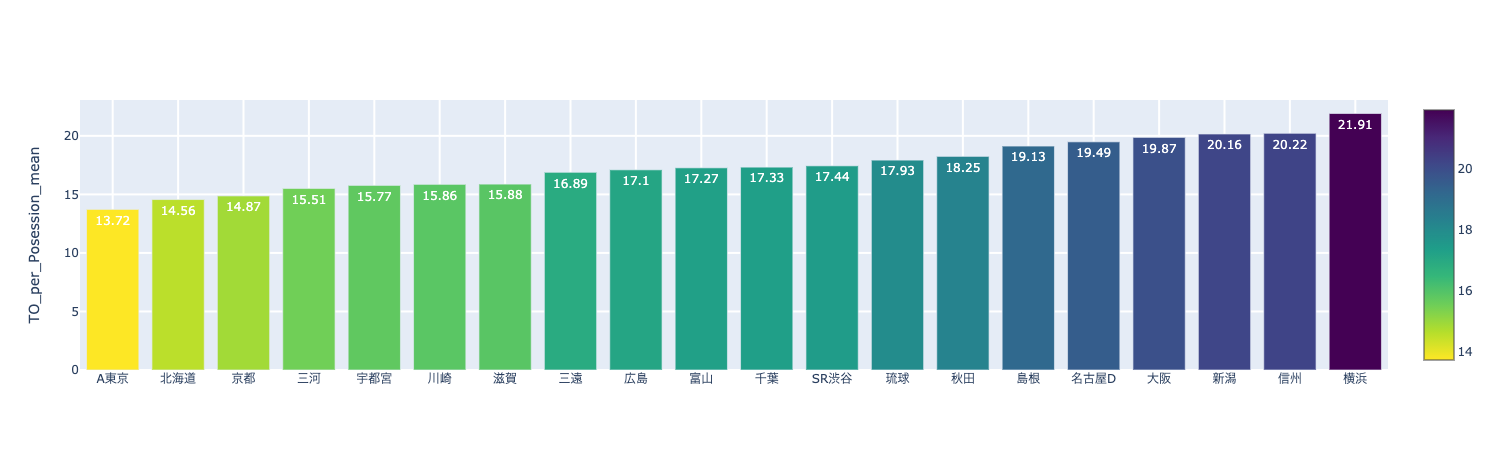

In [26]:
df_TO_team = aggregate(df_game_summary, key="NameShort", agg_dict={"TO_per_Posession": ["mean"]})

for ycol in ["TO_per_Posession_mean"]:
    BarPlotly().show(df_TO_team.sort_values(ycol, ascending=True), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

**Player**

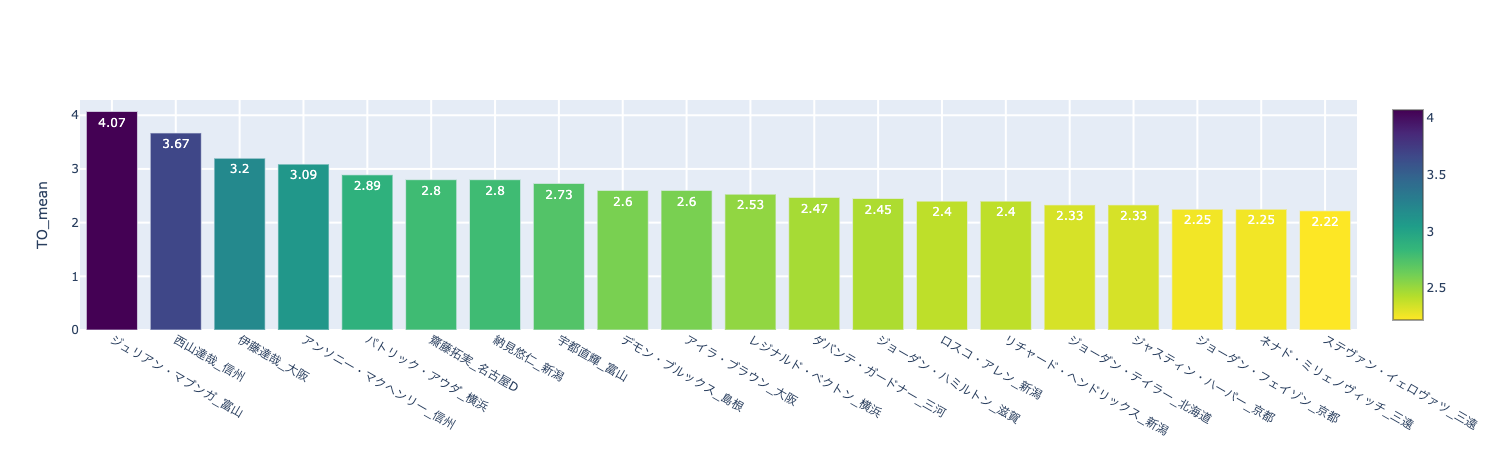

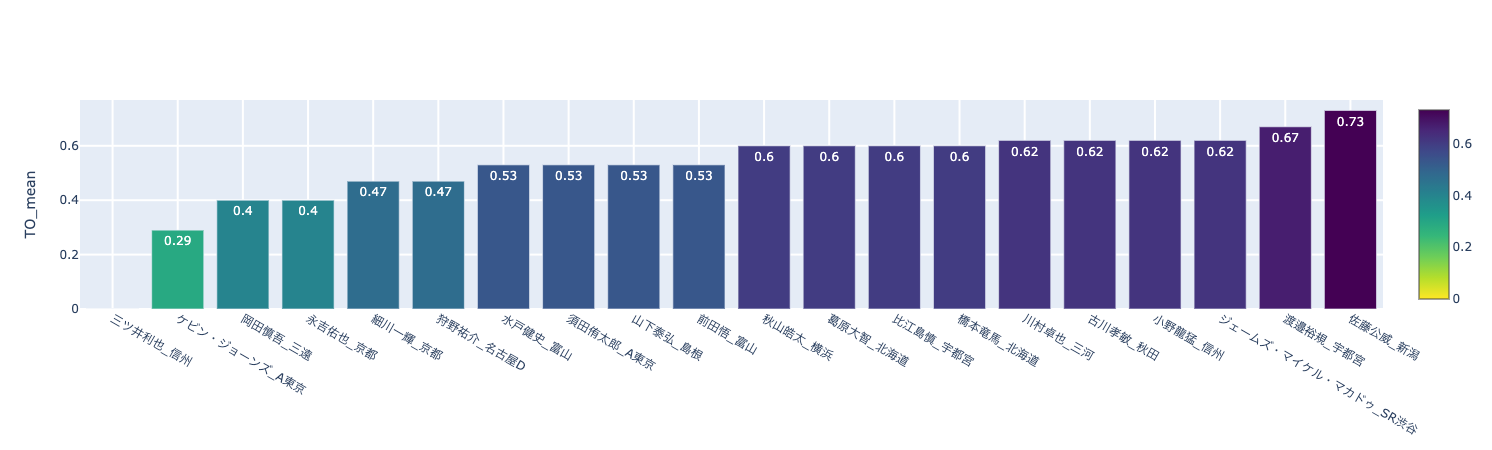

In [27]:
df_TO_player = aggregate(df_game_box, key="Player_Team", agg_dict={"TO": ["mean", "sum"], "MIN": ["mean"]})
df_TO_player = df_TO_player.merge(df_game_box.loc[:, ["Player_Team", "Position"]].drop_duplicates(), how="left", on="Player_Team")
df_TO_player = df_TO_player[df_TO_player["MIN_mean"] > 16]

for ycol in ["TO_mean"]:
    BarPlotly().show(df_TO_player.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player_head.png")
    BarPlotly().show(df_TO_player.sort_values(ycol, ascending=True).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player_tail.png")

**PG**

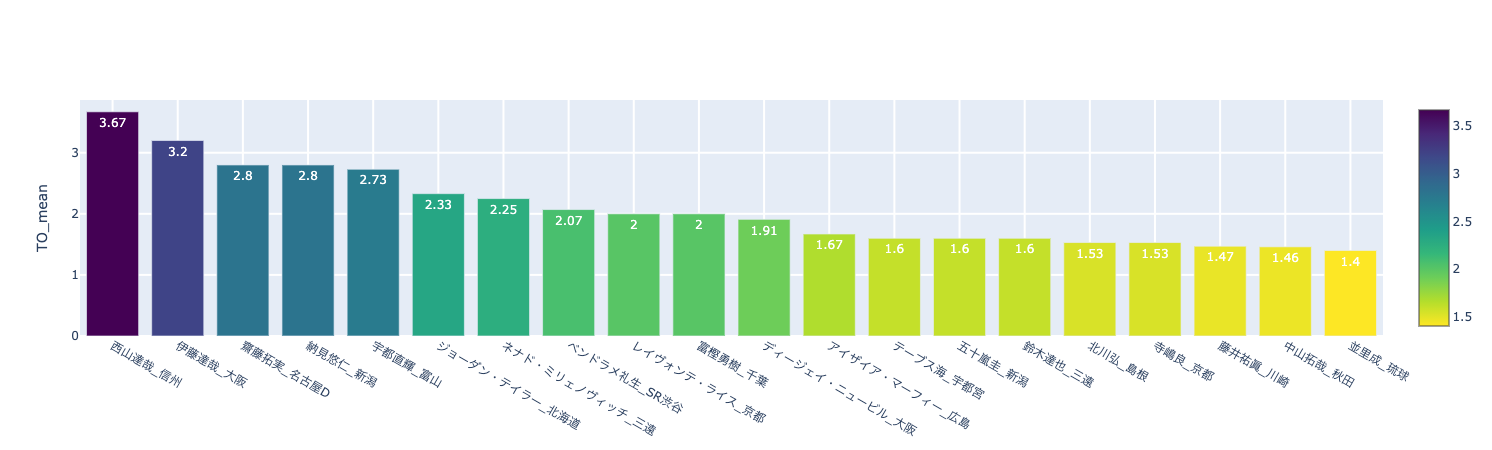

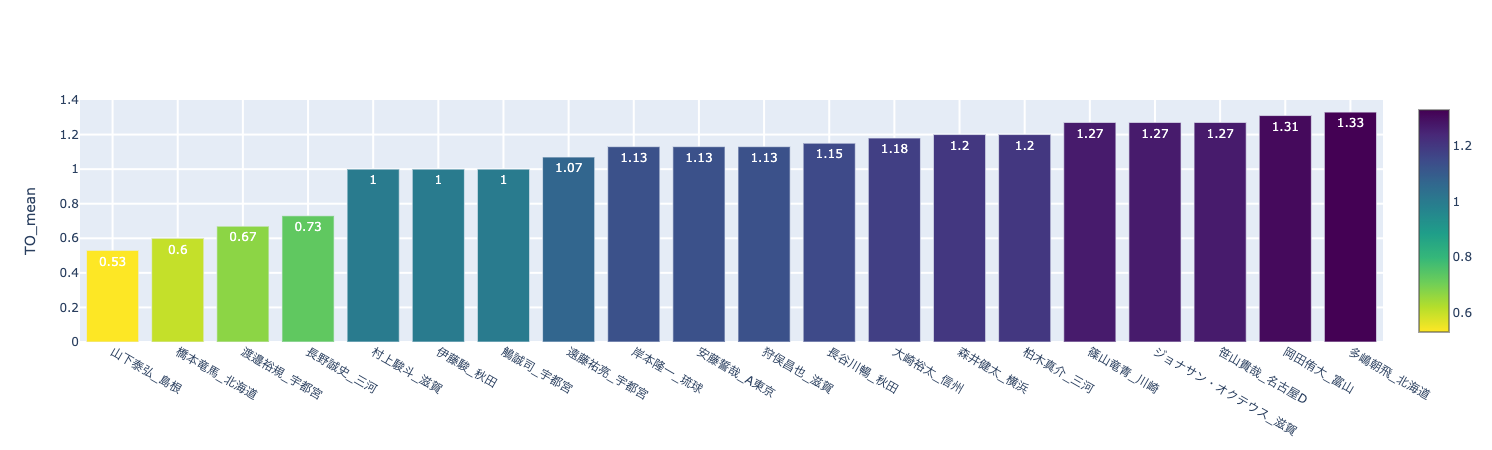

In [28]:
df_TO_player_PG = df_TO_player[df_TO_player["Position"].isin(["PG", "PG/SG"])]

for ycol in ["TO_mean"]:
    BarPlotly().show(df_TO_player_PG.sort_values(ycol, ascending=False).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player_pg_head.png")
    BarPlotly().show(df_TO_player_PG.sort_values(ycol, ascending=True).head(20), xcol="Player_Team", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}_player_pg_tail.png")

## Offence Efficiency

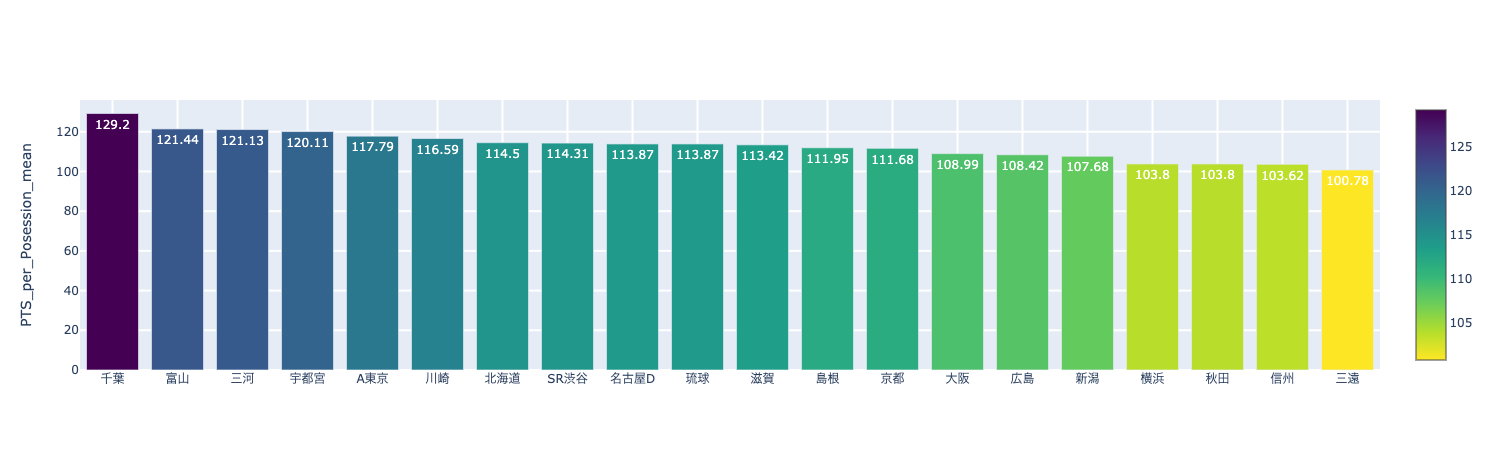

In [29]:
df_OE = aggregate(df_game_summary, key="NameShort", agg_dict={"PTS_per_Posession": ["mean"]})

for ycol in ["PTS_per_Posession_mean"]:
    BarPlotly().show(df_OE.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

## Defence Efficiency

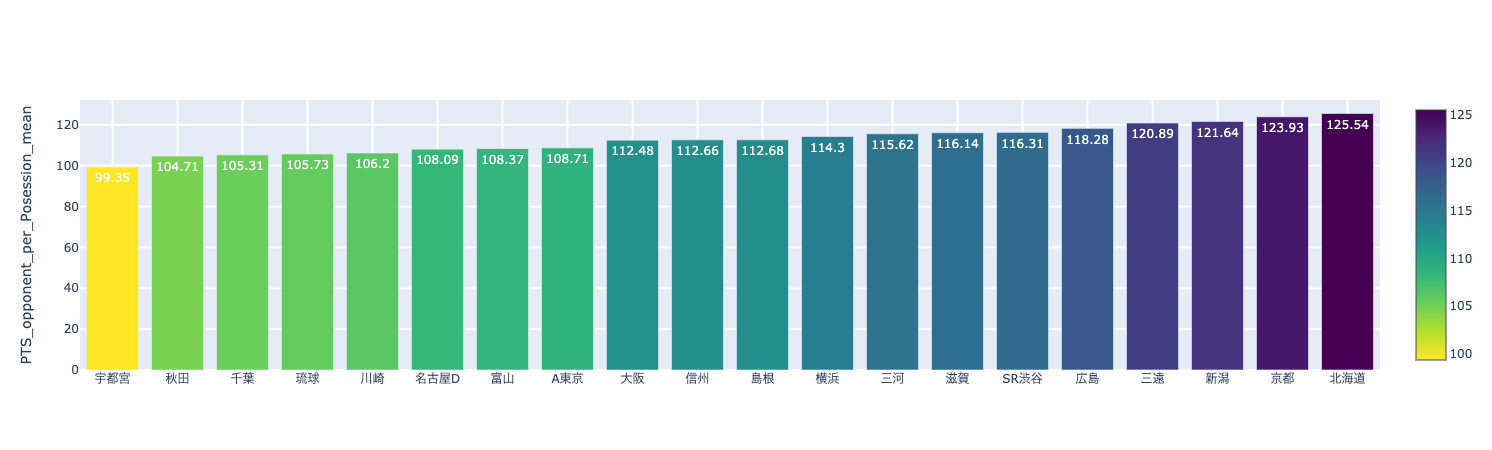

In [30]:
df_DE = aggregate(df_game_summary, key="NameShort", agg_dict={"PTS_opponent_per_Posession": ["mean"]})

for ycol in ["PTS_opponent_per_Posession_mean"]:
    BarPlotly().show(df_DE.sort_values(ycol, ascending=True), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")

##  1Q/4Qスコア平均

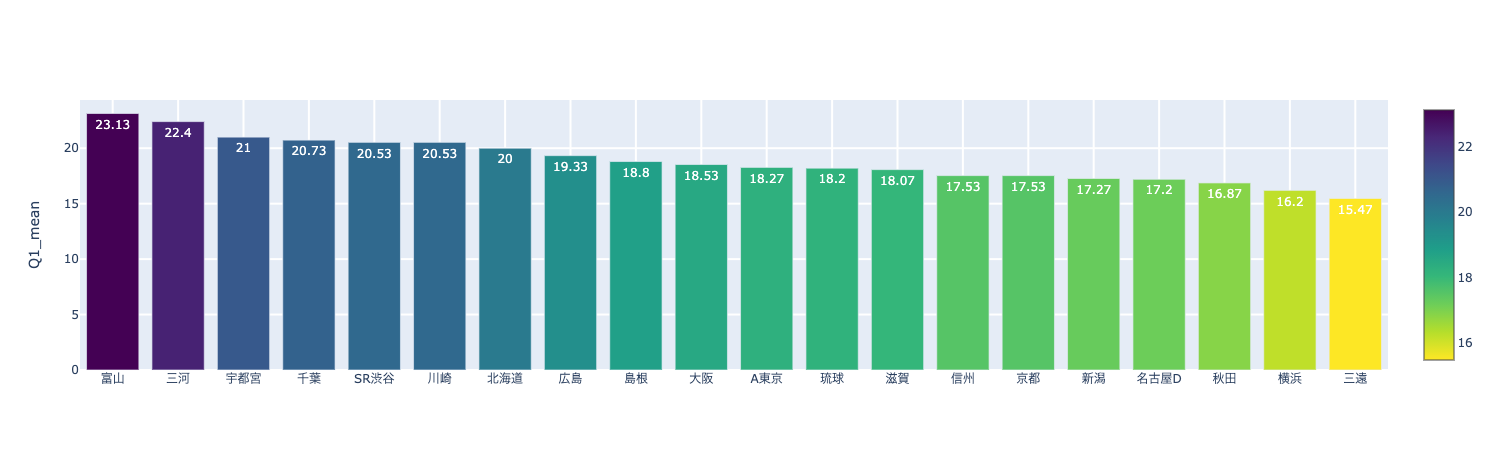

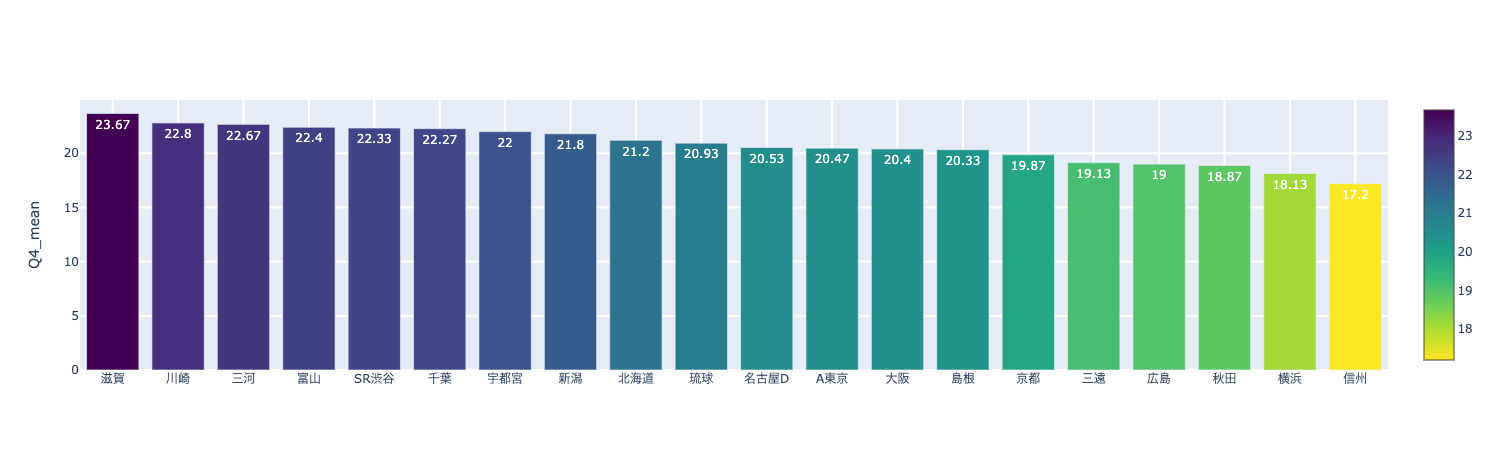

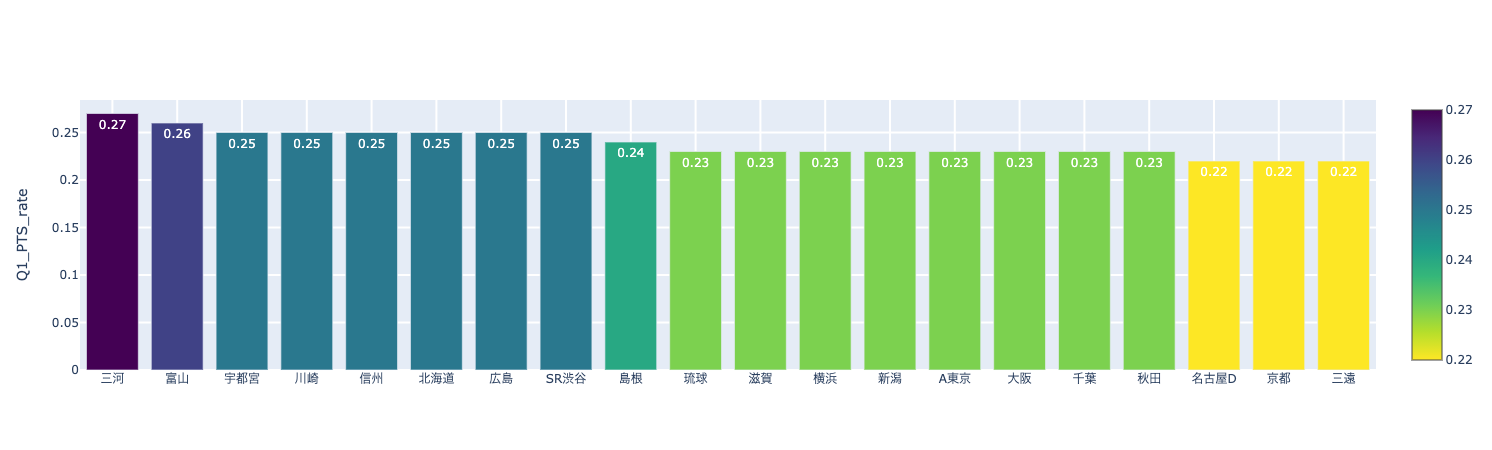

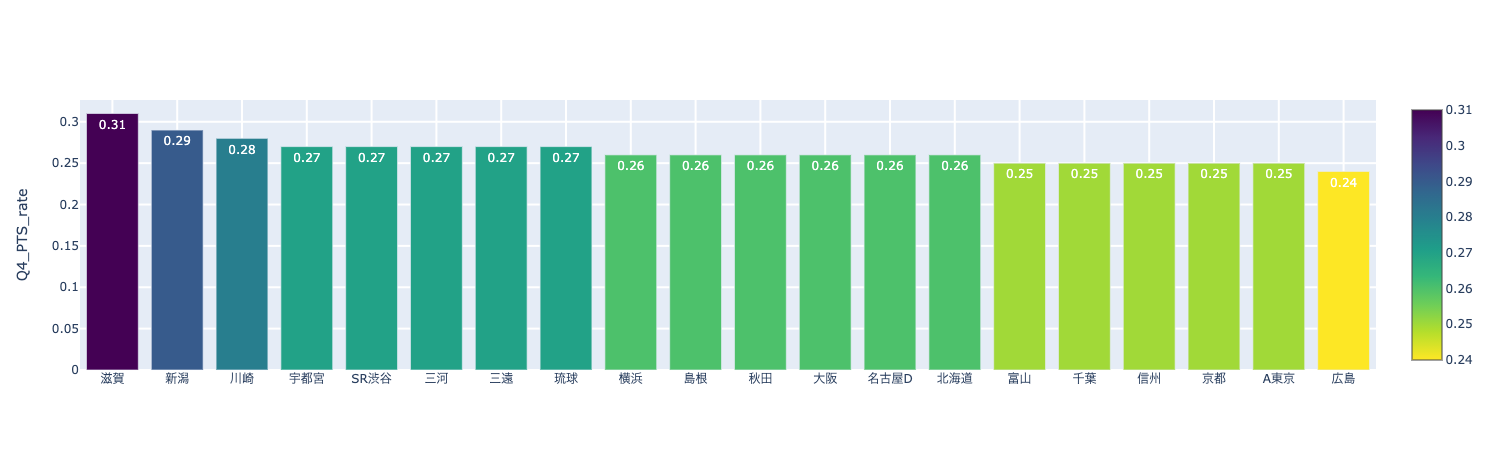

In [31]:
df_q = aggregate(df_game_summary, key="NameShort", agg_dict={"Q1": ["mean"], "Q4": ["mean"], "PTS": ["mean"]})
df_q["Q1_PTS_rate"] = (df_q["Q1_mean"] / df_q["PTS_mean"]).round(2)
df_q["Q4_PTS_rate"] = (df_q["Q4_mean"] / df_q["PTS_mean"]).round(2)

for ycol in ["Q1_mean", "Q4_mean", "Q1_PTS_rate", "Q4_PTS_rate"]:
    BarPlotly().show(df_q.sort_values(ycol, ascending=False), xcol="NameShort", ycol=ycol, ytitle=ycol, save_path=f"../outputs/{ycol}.png")